# Day Trading Strategy - Buying and Selling Logic

In [12]:
# !pip install nsepy

# Step 1 - Importing the packages

In [2]:
from pandas_datareader import data as pdr
import pandas as pd
from datetime import date
from nsepy import get_history

# Step 2 - Download Nifty OHLC data

In [5]:
data=pdr.get_data_yahoo("^NSEI","2010-01-01","2022-03-29")

nifty_opt = get_history(symbol="NIFTY",
                        start=date(2010,1,1),
                        end=date(2022,3,29),
                        index=True,
                        option_type='CE',
                        strike_price=17500,
                        expiry_date=date(2022,3,31))

In [6]:
nifty_opt.tail()

,Symbol,Expiry,Option Type,Strike Price,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Premium Turnover,Open Interest,Change in OI,Underlying
Date,,,,,,,,,,,,,,,,
2022-03-23,NIFTY,2022-03-31,CE,17500.0,218.65,227.25,133.40,144.60,138.00,144.60,164399,1.452311e+11,1.381949e+09,2201350,177350,NaN
2022-03-24,NIFTY,2022-03-31,CE,17500.0,119.85,144.95,80.65,93.25,86.50,93.25,313091,2.756351e+11,1.680494e+09,4199750,1998400,NaN
2022-03-25,NIFTY,2022-03-31,CE,17500.0,100.15,100.15,46.50,56.50,58.00,56.50,869428,7.635569e+11,2.807428e+09,5558550,1358800,NaN
2022-03-28,NIFTY,2022-03-31,CE,17500.0,58.00,58.00,23.75,41.70,40.75,41.70,1344603,1.179008e+12,2.480355e+09,5986250,427700,NaN
2022-03-29,NIFTY,2022-03-31,CE,17500.0,46.65,53.95,23.15,37.40,40.60,37.40,1577188,1.382931e+12,2.891095e+09,6710575,724325,17325.3


# Step 3 - Create a new dataframe

In [7]:
df=pd.DataFrame()

df['Underlying']=data['Adj Close']

df[['Last','Settle Price','Number of Contracts']]=nifty_opt[['Last','Settle Price','Number of Contracts']]

# Step 4 - Define two moving averages

In [8]:
m=15

n=20

df['SMA'] = df['Underlying'].rolling(window=m,center=False).mean()

df['LMA'] = df['Underlying'].rolling(window=n,center=False).mean()

df['SMA2'] = df['Underlying'].rolling(window=m,center=False).mean().shift(1)

df['LMA2'] = df['Underlying'].rolling(window=n,center=False).mean().shift(1)

df = df.iloc[n:]

# Step 5 - Define the buying and selling logic

In [9]:
df['Buy'] = df.apply(lambda x : 1 if x['SMA'] > x['LMA'] and x['SMA2'] < x['LMA2'] else 0, axis=1)

df['Sell'] = df.apply(lambda y : -1 if y['SMA'] < y['LMA'] and y['SMA2'] > y['LMA2'] else 0, axis=1)

df['Signal']=df['Buy']+df['Sell']


df=df[df['Last'].notnull()]

df=df[df['Number of Contracts']!=0]

df=75*df[df['Last']!=0]

# Step 6 - Computing the cumulative returns

<AxesSubplot:xlabel='Date'>

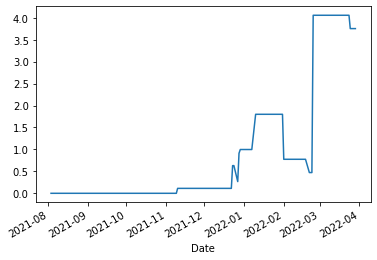

In [10]:
df['Daily Returns']=df['Underlying'].pct_change()

df['Strategy Returns']= df['Daily Returns']*df['Signal'].shift(1)

df['Strategy Returns'].cumsum().plot()